# 1.4.2 파이썬 기본 문법

In [1]:
import pandas as pd
import numpy as np


In [2]:
stocks = ['삼성전자', 'SK하이닉스']
for stock in stocks:
   print(stock)   # 화면에 출력

삼성전자
SK하이닉스


In [3]:
stock_list = {'005930':'삼성전자' , '000660':'SK하이닉스'}

In [4]:
for scode, sname in stock_list.items():
    print(scode, sname)    

005930 삼성전자
000660 SK하이닉스


In [5]:
# 예제 데이터프레임(df) 생성 
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])

for i, row in df.iterrows():
    print(i, row['종목코드'], row['종목명'])

0 005930 삼성전자
1 000660 SK하이닉스


# 1.4.3 데이터 이해

In [6]:
s = pd.Series([1, 2, 3])
s.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

In [7]:
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])
len(df)

2

# 1.4.4 데이터 선택

In [8]:
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])
df[['종목명']]   # 종목명만 선택

,종목명
0,삼성전자
1,SK하이닉스


In [9]:
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])

df.iloc[0] # 첫번째 행 선택

종목명       삼성전자
종목코드    005930
Name: 0, dtype: object

In [10]:
df.iloc[0, 1] # 첫번째 행의 두번째 열 선택

'005930'

In [11]:
df.iloc[-1]['종목명'] # 마지막 행의 종가 컬럼 선택 

'SK하이닉스'

In [12]:
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])

df['종목명'].isin(['삼성전자','현대차'])

0     True
1    False
Name: 종목명, dtype: bool

In [13]:
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])

df.query(" 종목명 == '삼성전자' ")  # 삼성전자만 추출

,종목명,종목코드
0,삼성전자,005930


In [14]:
df = pd.DataFrame([['삼성전자', 20000], ['SK하이닉스', 10000]], columns=['종목명', '주가'])

df.select_dtypes(exclude='object') # 문자형(object) 컬럼을 제외하고 수치형 컬럼만 선택


,주가
0,20000
1,10000


# 1.4.5 데이터 변환

In [15]:
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])

df.rename({'종목명':'scode'}, axis=1)  # 종목명 컬럼을 scode로 변경

,scode,종목코드
0,삼성전자,005930
1,SK하이닉스,000660


In [16]:
df = pd.DataFrame([['삼성전자', '20000'], ['SK하이닉스', '10000']], columns=['종목명', '주가_문자형'])

df['주가_수치형'] = df['주가_문자형'].astype(int) 

In [17]:
df = pd.DataFrame([['삼성전자', 20000], ['SK하이닉스', 10000], ['삼성전자우', 5000]], columns=['종목명', '주가'])

df[df['종목명'].str.contains('삼성')]

,종목명,주가
0,삼성전자,20000
2,삼성전자우,5000


In [18]:
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'], index=['row1', 'row2'])    # 임의의 인덱스 지정
df

,종목명,종목코드
row1,삼성전자,005930
row2,SK하이닉스,000660


In [19]:
df.reset_index(drop=True)  # 인덱스 초기화 

,종목명,종목코드
0,삼성전자,005930
1,SK하이닉스,000660


In [20]:
df = pd.DataFrame([['삼성전자', 20000], ['SK하이닉스', 10000]], columns=['종목명', '주가'])

df.sort_values(by='주가', ascending=True)   # 주가 오름차순 정렬

,종목명,주가
1,SK하이닉스,10000
0,삼성전자,20000


In [21]:
df = pd.DataFrame([['삼성전자', 2.5], ['SK하이닉스', -1.2]], columns=['종목명', '등락률'])

df['상승하락여부'] = np.where(df['등락률'] > 0, '상승', '하락')  # 주가 등락률에 따라 상승, 하락(보합포함) 값 생성 
df

,종목명,등락률,상승하락여부
0,삼성전자,2.5,상승
1,SK하이닉스,-1.2,하락


In [22]:
df = pd.DataFrame([['삼성전자', 815974664], ['SK하이닉스', 728002365]], columns=['종목명', '상장주식수'])

df['상장주식수_백만주'] = df['상장주식수'].apply(lambda x: x / 1000000)   # 상장주식수 단위를 백만주로 계산
df

,종목명,상장주식수,상장주식수_백만주
0,삼성전자,815974664,815.974664
1,SK하이닉스,728002365,728.002365


In [23]:
df = pd.DataFrame([['삼성전자', '매수'], ['SK하이닉스', None]], columns=['종목명', '투자의견'])   # 예제 데이터 : SK하이닉스 투자의견 결측치(None)
df 


,종목명,투자의견
0,삼성전자,매수
1,SK하이닉스,None


In [24]:
df['투자의견'] = df['투자의견'].fillna('투자의견없음')  # 투자의견 컬럼이 결측이면, 투자의견없음으로 대체 
df

,종목명,투자의견
0,삼성전자,매수
1,SK하이닉스,투자의견없음


In [26]:
df = pd.DataFrame([['삼성전자', '매수'], ['SK하이닉스', None]], columns=['종목명', '투자의견'])   # 예제 데이터 : SK하이닉스 투자의견 결측치(None)
df 

,종목명,투자의견
0,삼성전자,매수
1,SK하이닉스,None


In [27]:
df.dropna()  # 결측 데이터 포함시 제거 

,종목명,투자의견
0,삼성전자,매수


# 1.4.6 데이터 병합

In [28]:
df1 = pd.DataFrame([['삼성전자', '005930']], columns=['종목명','종목코드'])
df2 = pd.DataFrame([['SK하이닉스', '000660']], columns=['종목명','종목코드'])

# df1과 df2를 위아래로 단순 결합합니다. 
pd.concat([df1, df2], axis=0)

,종목명,종목코드
0,삼성전자,005930
0,SK하이닉스,000660


In [29]:
df1 = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])
df2 = pd.DataFrame([[20000], [10000]], columns=['주가'])

# df1과 df2를  좌우로 결합합니다. 
pd.concat([df1, df2], axis=1)


,종목명,종목코드,주가
0,삼성전자,005930,20000
1,SK하이닉스,000660,10000


In [30]:
df1 = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660'], ['현대차', 15000]], columns=['종목명','종목코드'])
df2 = pd.DataFrame([['삼성전자', 20000], ['SK하이닉스', 10000]], columns=['종목명','주가'])

 # 종목명을 기준으로 df1과 df2를 조인. inner를 사용하여 공통집합 결합 (현대차는 제외)
df1.merge(df2, on='종목명', how='inner')  

,종목명,종목코드,주가
0,삼성전자,005930,20000
1,SK하이닉스,000660,10000


# 1.4.7 데이터 그룹화

In [31]:
df = pd.DataFrame([['반도체', '삼성전자', 2.5], 
                   ['반도체', 'SK하이닉스', -1.5], 
                   ['자동차', '현대차', -0.5], 
                   ['자동차', '기아차', 4.2]],  
                   columns=['업종', '종목명','등락률'])
df          

,업종,종목명,등락률
0,반도체,삼성전자,2.5
1,반도체,SK하이닉스,-1.5
2,자동차,현대차,-0.5
3,자동차,기아차,4.2


In [32]:
df.groupby('업종')['등락률'].mean()  # 업종을 그룹화하고, 업종별 주가 등락률 평균 계산

업종
반도체    0.50
자동차    1.85
Name: 등락률, dtype: float64

In [33]:
df = pd.DataFrame({'등락률':[2.5, -1.5, 0.5, 4.2, 5.3, -0.1]})

df['등락률_그룹'] = pd.qcut(df['등락률'], 3, labels=['낮음', '중간', '높음'])  # 등락률에 따라 3개 그룹으로 생성하고, 생성값은 낮음/중간/높음으로 지정
df

,등락률,등락률_그룹
0,2.5,중간
1,-1.5,낮음
2,0.5,중간
3,4.2,높음
4,5.3,높음
5,-0.1,낮음


# 1.4.8 통계 분석

In [34]:
np.mean([1, 2, np.nan, 4, 5])

nan

In [35]:
np.nanmean([1, 2, np.nan, 4, 5])

3.0

In [36]:
scores = np.array([90, 80, 70])  # 점수 
weights = np.array([3, 2, 1])  # 가중치 
np.average(scores, weights=weights)  # 평균 계산시 가중치(weight) 적용

83.33333333333333

In [37]:
stock_price = pd.Series([10000, 11000, 12000, 13000, 14000, 15000])  # 5일치 주가 데이터
stock_price.rolling(window=3).mean() # 3일 이동 평균 계산 

0        NaN
1        NaN
2    11000.0
3    12000.0
4    13000.0
5    14000.0
dtype: float64

In [38]:
df = pd.DataFrame([['삼성전자', 2.5], ['SK하이닉스', -1.5], ['현대차', -0.5], ['기아차', 4.2]], columns=['종목명','등락률'])

df['수익률_순위'] = df['등락률'].rank(ascending=False) # 등락률에 따라 순위 생성 (큰 값 1순위) 
df

,종목명,등락률,수익률_순위
0,삼성전자,2.5,2.0
1,SK하이닉스,-1.5,4.0
2,현대차,-0.5,3.0
3,기아차,4.2,1.0


In [39]:
data = {
    '삼성전자': [80000, 81000, 79500, 82000, 81500],
    'SK하이닉스': [120000, 122000, 119000, 125000, 123000],
    '현대차': [200000, 198000, 199000, 200300, 201500]
}
df = pd.DataFrame(data)   # 종목별 주가 데이터 생성 

df.corr()  # 상관계수 출력

,삼성전자,SK하이닉스,현대차
삼성전자,1.000000,0.989748,0.419490
SK하이닉스,0.989748,1.000000,0.406936
현대차,0.419490,0.406936,1.000000


In [40]:
# 예제 데이터프레임 생성 
data = {
    '업종':['반도체','반도체','반도체','자동차','자동차','자동차'],
    '시총규모': ['대형주', '대형주','소형주', '대형주','대형주','소형주'],
    '종목명': ['삼성전자', 'SK하이닉스','지니틱스', '현대차','기아차','영화금속'],
    '등락률': [2.5, -1.0, 1.1, 3.1, 1.1,-1.5]
}
df = pd.DataFrame(data)
df

,업종,시총규모,종목명,등락률
0,반도체,대형주,삼성전자,2.5
1,반도체,대형주,SK하이닉스,-1.0
2,반도체,소형주,지니틱스,1.1
3,자동차,대형주,현대차,3.1
4,자동차,대형주,기아차,1.1
5,자동차,소형주,영화금속,-1.5


In [41]:
# 집계표 생성 : 업종과 시총규모에 따른 주가 등락률 평균
pd.pivot_table(data=df, index='업종', columns='시총규모', values='등락률', aggfunc=np.mean)

C:\Users\DrFirst\AppData\Local\Temp\ipykernel_10032\2113299187.py:2: FutureWarning: The provided callable <function mean at 0x0000024BEE539760> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data=df, index='업종', columns='시총규모', values='등락률', aggfunc=np.mean)


시총규모,대형주,소형주
업종,,
반도체,0.75,1.1
자동차,2.10,-1.5


<Axes: xlabel='symbol'>

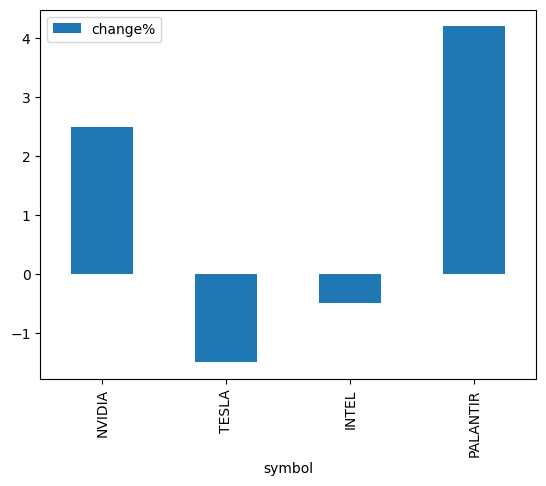

In [42]:
# 예제 데이터 생성 : 종목코드별 주가 수익률
df = pd.DataFrame([['NVIDIA', 2.5], 
                   ['TESLA', -1.5], 
                   ['INTEL', -0.5], 
                   ['PALANTIR', 4.2]], 
                  columns=['symbol','change%'])

# 막대그래프 
df.plot(x='symbol', y='change%', kind='bar')

# 1.4.9 데이터 저장

In [44]:
# 예제 데이터 생성 
df = pd.DataFrame([['삼성전자', '005930'], ['SK하이닉스', '000660']], columns=['종목명','종목코드'])

# 피클 파일 저장 
df.to_pickle("종목정보.pkl")

# 로컬 저장여부 확인 
import os  
print(os.listdir('.'))

['.gitkeep', '.ipynb_checkpoints', '1.4 파이썬 필수 문법.ipynb', '종목정보.pkl']


In [45]:
# 피클 파일 불러오기 
new_data = pd.read_pickle("종목정보.pkl")
new_data 

,종목명,종목코드
0,삼성전자,005930
1,SK하이닉스,000660
